## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Your Name : Fatih Aracı 2014719111

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt


df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


LINE FITTING USING MEAN

1990.5 3.0652496


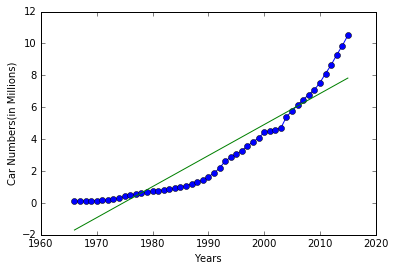

In [5]:
year = np.matrix(df_arac.Year).T
car = np.matrix(df_arac.Car).T / 1000000

year_mean = np.mean(year)
car_mean = np.mean(car)

print (year_mean,car_mean)   

car_merror = car-car_mean
year_merror = year-year_mean

x_hatasi = np.power (year_merror,2)
xy_hatasi = np.multiply(car_merror,year_merror)

x_hatasi_total = np.matrix.sum(x_hatasi)
xy_hatasi_total = np.matrix.sum(xy_hatasi)

m= xy_hatasi_total/x_hatasi_total
c=car_mean-(m*year_mean)

y = m*year + c


plt.plot(year, car, "bo-")
plt.xlabel("Years")
plt.ylabel("Car Numbers(in Millions)")

plt.plot(year, y, "g-")
plt.show()

POLYNOMINAL FITTING

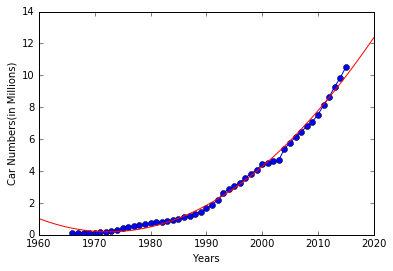

In [6]:
# y = A (vandermonde).w + €
# Vandermonde matrix will be created using year column. We will try and choose the optimal degree
# y car numbers
# in order to calculate y we need to find w approxly --> A.T*y=A.T*A*w

# to best polynomial fit depends on the degree, so lets make this parametric to find optimum
degree = 2
vm = np.hstack(np.power(year, i) for i in range(degree + 1))

#using linalg method to least squares calculation w_ls (actually we dont need others)
w_ls, E, rank, sigma = np.linalg.lstsq(vm, car)


# since we have w_ls matrix now we can estimate any year we want so we will choose the whole data
years = np.matrix (np.linspace(1960,2020,61)).T

# lets create vandermonde matrix again
years_vm = np.hstack(np.power(years, i) for i in range(degree + 1))

# Finally we can estimate the values:
f =years_vm*w_ls

# blue dots shows the real data / red line shows our estimation; it seems a very good fit!

plt.plot(year, car, "bo-")
plt.xlabel("Years")
plt.ylabel("Car Numbers(in Millions)")

plt.plot(years,f, "r-")
plt.show()

Auto Regression AR MODEL

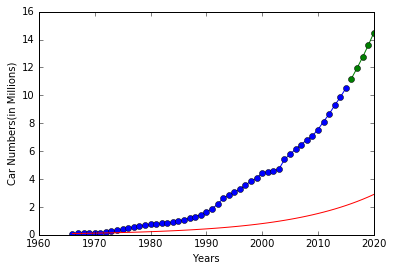

In [8]:
# In auto regression estimation is done with the past data.
# y(1toN)= w*y(0toN-1)

car_y_AR = np.matrix(df_arac.Car[1:]).T / 1000000
car_A_AR = np.matrix(df_arac.Car[:-1]).T / 1000000

w_ls_AR, E_AR, rank_AR, sigma_AR = np.linalg.lstsq(car_A_AR, car_y_AR)
years_AR = np.matrix (np.linspace(1966,2020,55)).T
years_AR2 = np.matrix (np.linspace(2016,2020,5)).T


# create a result matrix with the same size
result_AR = np.matrix (np.linspace(0,0,55)).T
result_AR2 = np.matrix (np.linspace(0,0,5)).T

# to be able to iterate matrixes we need to assign first indexes to each other
result_AR[0]=car_A_AR[0]

# we actually know data up to year 2016
# however this will show us the diffrence of using AR from the begining.
for i in range (len(years_AR)-1):
    result_AR[i+1]=result_AR[i]*w_ls_AR

# lets try from the end to see a better estimation
result_AR2[0]=car_y_AR[-1]*w_ls_AR
    
for i in range (4):
    result_AR2[i+1]=result_AR2[i]*w_ls_AR
    
# BLUE DOTS  -> Real Data
# RED LINE   -> AR from the begining
# GREEN DOTS -> AR from the end


plt.plot(year, car, "bo-")
plt.xlabel("Years")
plt.ylabel("Car Numbers(in Millions)")

plt.plot(years_AR,result_AR, "r-")

plt.plot(years_AR2,result_AR2, "go-")
plt.show()     

I would choose polynomial fitting depending on the results. Using years to estimate car numbers is really useful. AR also works well if we use recent data. 